In [1]:
import pyforest
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CC_GENERAL.csv')

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data = data.drop('CUST_ID',axis=1)
print(data.info())
print(data.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [5]:
#data consist of missing vlaues
#Treating Missing Values
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data = data.apply(lambda x: Missing_imputation(x))

In [6]:
data.isna().sum().sum()

0

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [8]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

data_summary=data.apply(lambda x: var_summary(x)).T
data_summary.to_csv('Detail_summary_report.csv')
data_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


# Deriving New KPI

In [9]:
# Monthly average Purchase
data['Monthly_avg_purchase'] = data.PURCHASES / data.TENURE

# Monthly cash advance
data['Monthly_cash_advance'] = data.CASH_ADVANCE/data.TENURE

#Limit_usage
data['Limit_usage'] = data.BALANCE/data.CREDIT_LIMIT

In [10]:
data.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(10)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


#### There are 2 types of purchases & 4 types of purchase behaviour exist.
               
      People who only do One-Off Purchases.
      People who only do Installments Purchases.
      People who do both.
      People who do none.
               
So deriving a categorical variable Purchase type based on the behaviour to find what type of purchases customers are making on credit card,lets explore the data..

In [11]:
#Purchase Type
def purchase(data):
    if(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'None'
    if(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'    
    if(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'Installment_Purchases'
    if(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'Both'
data['purchase_type'] = data.apply(purchase,axis=1)
data.purchase_type.value_counts()
installment = data[data.purchase_type == 'Installment_Purchases']
one_off = data[data.purchase_type == 'one_off']

In [12]:
ProfileReport(data)

Number of variables,21
Number of observations,8950
Total Missing (%),0.0%
Total size in memory,1.4 MiB
Average record size in memory,168.0 B
Numeric,17
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,3


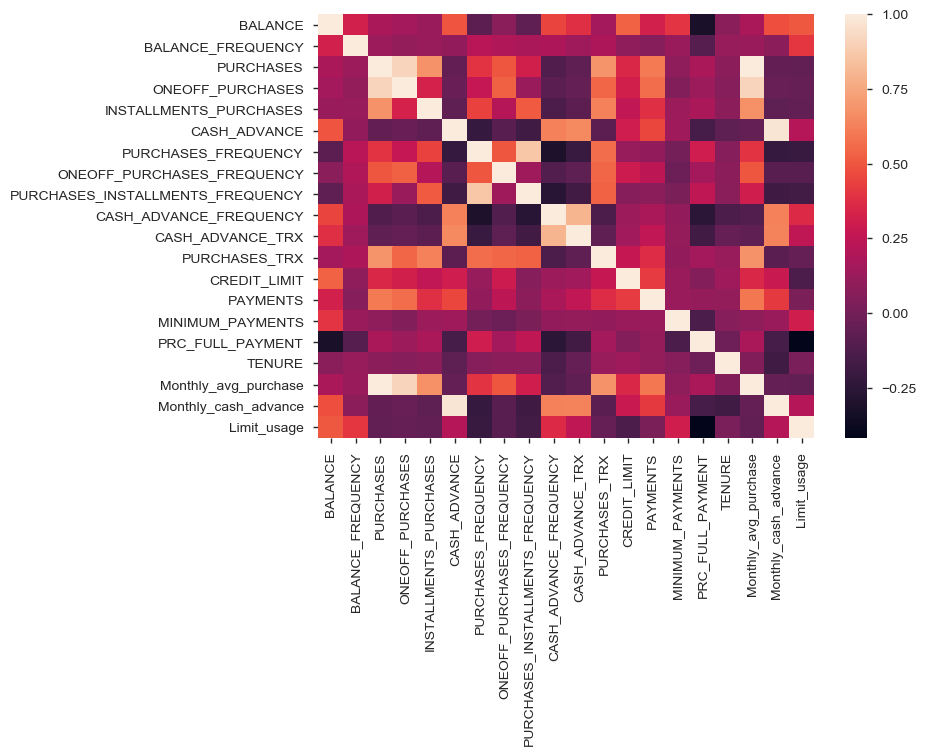

In [13]:
sns.heatmap(data.corr())

#### Preparing for Machine Learning Model

In [14]:
# Original dataset with categorical column converted to number type.
data_final=pd.concat([data,pd.get_dummies(data['purchase_type'])],axis=1)
data_final.drop('purchase_type',inplace=True,axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 24 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT           

In [15]:
# Removing outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

data=data_final.apply(lambda x: outlier_capping(x))

In [16]:
# standardizing Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
from sklearn.decomposition import PCA

var_ratio= {}
for n in range(3,len(data.columns)):
    pca = PCA(n_components=n)
    data_pca = pca.fit(data_scaled)
    var_ratio[n] = sum(data_pca.explained_variance_ratio_)
print(var_ratio)

{3: 0.6044530526048912, 4: 0.6773739787100979, 5: 0.7302290465506749, 6: 0.7785502309394841, 7: 0.8158139048106094, 8: 0.8500885230181497, 9: 0.8801725905873065, 10: 0.9023603414818337, 11: 0.9215592796088973, 12: 0.9397485437616082, 13: 0.9541874505039593, 14: 0.9671607055821484, 15: 0.9757848336278138, 16: 0.9833913139218087, 17: 0.9891681605158793, 18: 0.9936071417770822, 19: 0.9967690438705756, 20: 0.9985069177814209, 21: 0.999564865902094, 22: 0.9998578616272448, 23: 0.9999999999999996}


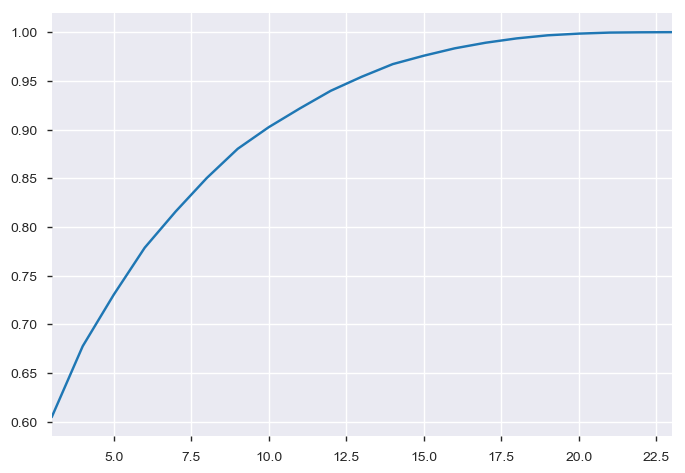

In [18]:
pd.Series(var_ratio).plot()

In [19]:
# Selecting 6 components it covers 78% variance
pca = PCA(n_components=6)
data_pca6 = pca.fit(data_scaled)
data_pca6.explained_variance_

array([7.02631809, 5.16369219, 2.31848405, 1.75029782, 1.26866337,
       1.15983799])

In [20]:
reduced_data = data_pca6.fit_transform(data_scaled)

In [21]:
data_final = pd.DataFrame(reduced_data)
data_final.shape

(8950, 6)

In [22]:
columns = data.columns
pd.DataFrame(data_pca6.components_.T,columns=['PCA_' + str(i) for i in range(6)],index = columns)

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
BALANCE,-0.043980,0.362824,0.080885,-0.198376,0.212241,-0.081976
BALANCE_FREQUENCY,0.059923,0.183940,0.131608,-0.358120,-0.128919,0.116303
PURCHASES,0.329591,0.142608,-0.100353,0.028182,-0.017388,-0.016828
ONEOFF_PURCHASES,0.266766,0.152287,-0.308680,-0.001789,-0.030978,0.040513
INSTALLMENTS_PURCHASES,0.282342,0.062633,0.258077,0.054259,-0.026049,-0.076010
CASH_ADVANCE,-0.154300,0.329744,0.081830,0.281219,0.057478,0.083487
PURCHASES_FREQUENCY,0.313426,-0.020138,0.218746,-0.009043,0.059252,0.244802
ONEOFF_PURCHASES_FREQUENCY,0.250145,0.118463,-0.316819,-0.040154,-0.062165,0.153644
PURCHASES_INSTALLMENTS_FREQUENCY,0.265689,-0.033931,0.414522,0.019790,-0.013752,0.090639
CASH_ADVANCE_FREQUENCY,-0.175237,0.304953,0.067999,0.152170,-0.135713,0.196089


In [23]:
# Factor Analysis : variance explained by each component.

pd.Series(data_pca6.explained_variance_,index = ['PCA_'+ str(i) for i in range(6)])

PCA_0    7.026318
PCA_1    5.163692
PCA_2    2.318484
PCA_3    1.750298
PCA_4    1.268663
PCA_5    1.159838
dtype: float64

In [24]:
Loadings =  pd.DataFrame((data_pca6.components_.T * np.sqrt(data_pca6.explained_variance_)).T,columns=data.columns).T
Loadings.to_csv('Loadings.csv')

### Clustring

In [25]:
from sklearn.cluster import KMeans
km_1 = KMeans(n_clusters = 5,random_state = 123)
km_1.fit(data_final)
km_1.labels_

array([4, 3, 2, ..., 4, 0, 2])

In [26]:
labels = pd.Series(km_1.labels_)
pd.Series(km_1.labels_).value_counts()

4    2854
0    1727
2    1629
1    1580
3    1160
dtype: int64

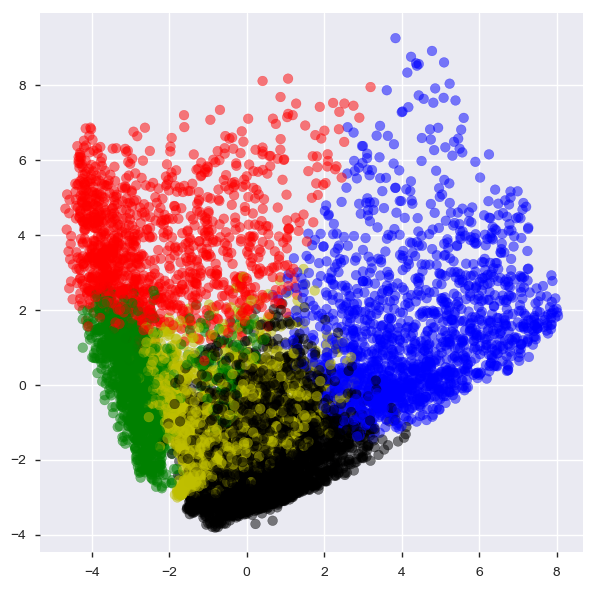

In [27]:
color_map = {0: 'g',1:'b',2:'y',3:'r',4:'k'}
label_color = [color_map[i] for i in km_1.labels_]
plt.figure(figsize=(7,7))
plt.scatter(data_final.iloc[:,0],data_final.iloc[:,1],c=label_color,cmap = 'Spectral',alpha = 0.5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


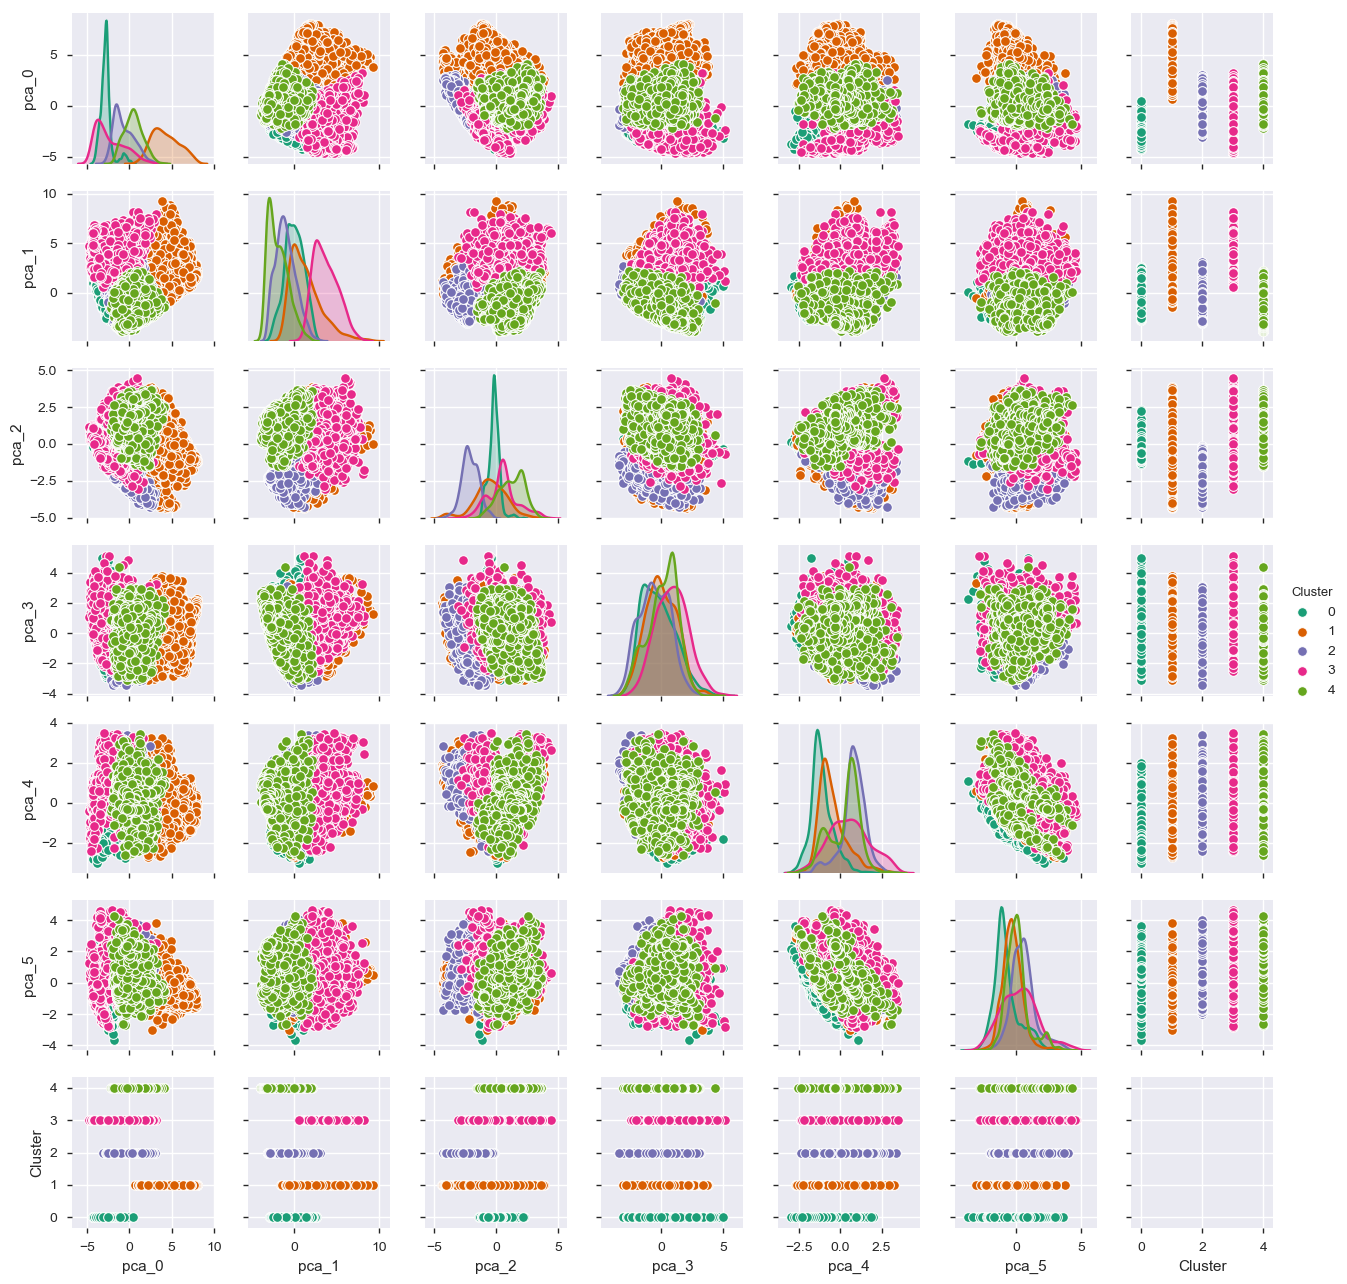

In [28]:
pair_plot = pd.DataFrame(reduced_data,columns = ['pca_' + str(i) for i in range(6) ])

pair_plot['Cluster'] = km_1.labels_
sns.pairplot(pair_plot,hue = 'Cluster',palette = 'Dark2',diag_kind = 'kde',size = 1.85)

In [29]:
ls  = ['BALANCE','CREDIT_LIMIT','TENURE','PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']
ls2 = data.columns
col_list =ls2.difference(ls)
col_list

Index(['BALANCE_FREQUENCY', 'Both', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'Installment_Purchases', 'Limit_usage',
       'MINIMUM_PAYMENTS', 'Monthly_avg_purchase', 'Monthly_cash_advance',
       'None', 'ONEOFF_PURCHASES_FREQUENCY', 'PAYMENTS', 'PRC_FULL_PAYMENT',
       'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PURCHASES_TRX', 'one_off'],
      dtype='object')

In [30]:
# Conactenating labels found through Kmeans with data 
cluster_df_5 = pd.concat([data[col_list],pd.Series(km_1.labels_, name ='Cluster_5')],axis = 1)
cluster_df_5.head()

,BALANCE_FREQUENCY,Both,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,Installment_Purchases,Limit_usage,MINIMUM_PAYMENTS,Monthly_avg_purchase,Monthly_cash_advance,None,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,one_off,Cluster_5
0,0.818182,0,0.000000,0,1,0.040901,139.509787,7.950000,0.000000,0,0.000000,201.802084,0.000000,0.166667,0.083333,2,0,4
1,0.909091,0,0.250000,4,0,0.457495,1072.340217,0.000000,425.548562,1,0.000000,4103.032597,0.222222,0.000000,0.000000,0,0,3
2,1.000000,0,0.000000,0,0,0.332687,627.284787,64.430833,0.000000,0,1.000000,622.066742,0.000000,1.000000,0.000000,12,1,2
3,0.636364,0,0.083333,1,0,0.222223,312.343947,124.916667,17.149001,0,0.083333,89.988924,0.000000,0.083333,0.000000,1,1,2
4,1.000000,0,0.000000,0,0,0.681429,244.791237,1.333333,0.000000,0,0.083333,678.334763,0.000000,0.083333,0.000000,1,1,2


In [31]:
cluster_5 = cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_list].mean()).T
cluster_5

Cluster_5,0,1,2,3,4
BALANCE_FREQUENCY,0.878418,0.978055,0.819703,0.960630,0.838515
Both,0.068327,0.934177,0.073665,0.223276,0.280659
CASH_ADVANCE_FREQUENCY,0.216948,0.068183,0.061579,0.413474,0.028036
CASH_ADVANCE_TRX,4.145339,1.467089,1.084715,10.155172,0.499299
Installment_Purchases,0.019108,0.016456,0.000000,0.127586,0.719341
Limit_usage,0.558846,0.319588,0.343338,0.625932,0.238561
MINIMUM_PAYMENTS,553.075647,737.294667,438.094565,1413.675232,406.801621
Monthly_avg_purchase,2.343230,230.721004,53.209465,37.839310,47.851806
Monthly_cash_advance,94.559341,35.936383,22.357045,319.173413,11.318543
None,0.903301,0.000000,0.000000,0.415517,0.000000


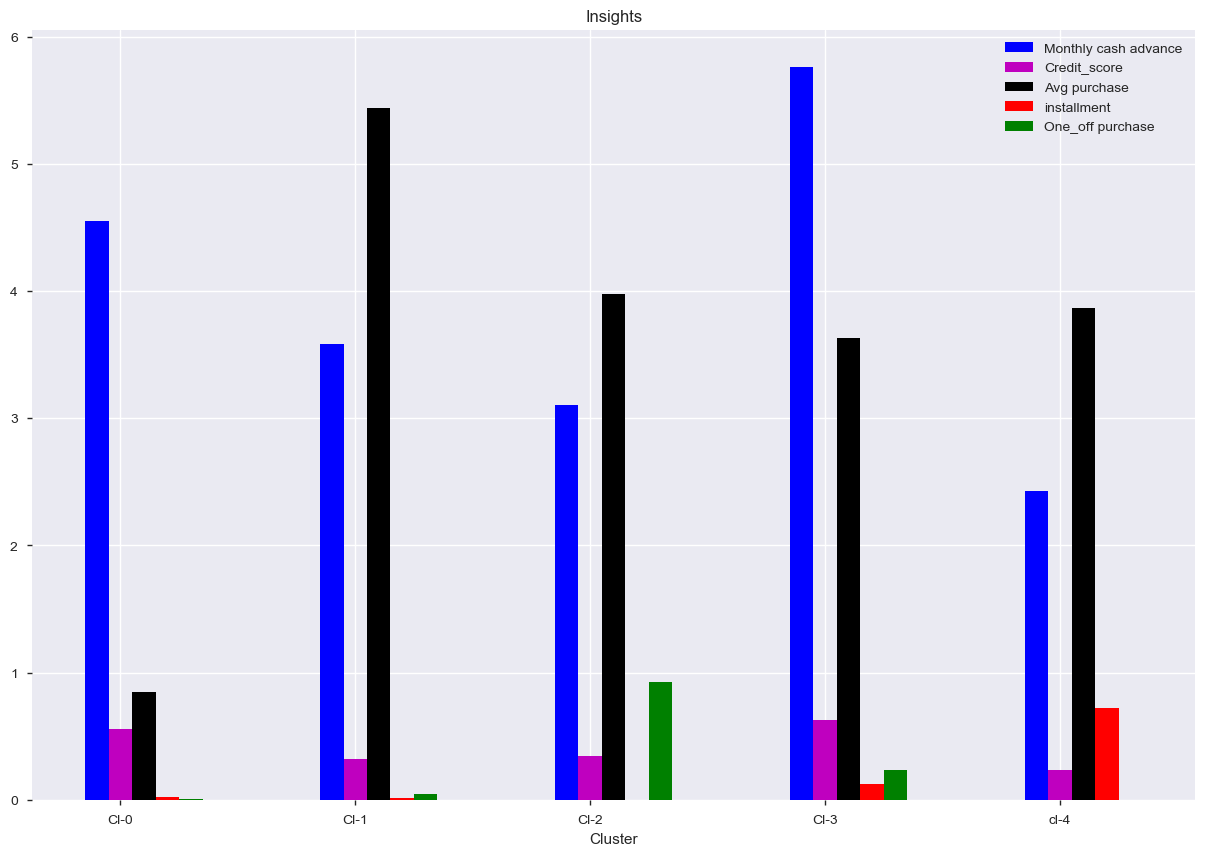

In [34]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_5.columns))

cash_advance=np.log(cluster_5.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_5.loc['Limit_usage',:].values)
purchase= np.log(cluster_5.loc['Monthly_avg_purchase',:].values)
installment=cluster_5.loc['Installment_Purchases',:].values
one_off=cluster_5.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,installment,color='r',label='installment',width=bar_width)
b5=plt.bar(index+4*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)
plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','cl-4'))
plt.legend()

#### Clusters are clearly distinguishing behavior within customers

* Cluster 0 customers having Credit Score and Monthly Cash Advance are high.
* Cluster 1 customers doing maximum Average Purchases.
* Cluster 2 customers have highest One Off Purchases and Monthly Cash Advance or Average Purchases are also high.
* Cluster 3 customers have maximum Monthly Cash advance and Credit Score, customers also doing installments and One Off Purchases.
* Cluster 4 customers have maximum installments among all clusters.

In [33]:
# Percentage of each cluster in the total customer base
percentage = cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print(percentage,'\n')
s = pd.Series((percentage.values.astype('float')/ cluster_df_5.shape[0])*100,name = 'percentage')
print('Cluster -5 ','\n')
print(pd.concat([pd.Series(s.values,name = 'Size'),s],axis=1),'\n')

Cluster_5   
0          0    1727
1          1    1580
2          2    1629
3          3    1160
4          4    2854
Name: Cluster_5, dtype: int64 

Cluster -5  

        Size  percentage
0  19.296089   19.296089
1  17.653631   17.653631
2  18.201117   18.201117
3  12.960894   12.960894
4  31.888268   31.888268 



### Finding Behaviour with 4 Clusters:

In [35]:
km_2 = KMeans(n_clusters=4,random_state=11)
km_2 = km_2.fit(data_final)
km_2.labels_

array([2, 3, 0, ..., 2, 0, 0])

In [37]:
pd.Series(km_2.labels_).value_counts()

0    3104
2    2568
1    1727
3    1551
dtype: int64

Text(0, 0.5, 'PC_1')

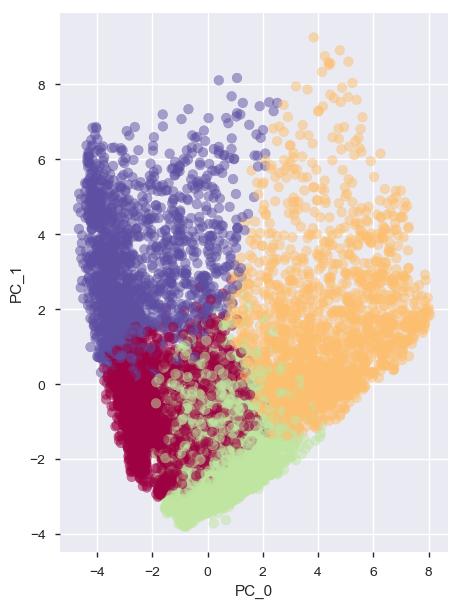

In [42]:
plt.figure(figsize=(5,7))
plt.scatter(data_final.iloc[:,0],data_final.iloc[:,1],c=km_2.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [47]:
cluster_df_4 = pd.concat([data[col_list],pd.Series(km_2.labels_,name = 'Cluster_4')],axis=1)
#Finding Mean of features for each cluster
cluster_df_4.groupby('Cluster_4').apply(lambda x:x[col_list].mean()).T

Cluster_4,0,1,2,3
BALANCE_FREQUENCY,0.844166,0.974291,0.831050,0.946535
Both,0.132410,0.909670,0.209502,0.163765
CASH_ADVANCE_FREQUENCY,0.109162,0.072070,0.024776,0.396792
CASH_ADVANCE_TRX,1.906572,1.563405,0.439642,9.479046
Installment_Purchases,0.013853,0.015055,0.790498,0.103804
Limit_usage,0.435052,0.324081,0.221849,0.616705
MINIMUM_PAYMENTS,459.132546,735.904987,398.185225,1235.347108
Monthly_avg_purchase,28.032500,223.938090,47.214679,26.257616
Monthly_cash_advance,39.981295,37.884978,10.601948,285.165875
None,0.384021,0.000000,0.000000,0.548034


#### With Cluster 4
* cluster 1 have highest Monthly Average Purchase and payments.
* cluster 3 have highest mimnimum payments and highest Monthly cash advance.

In [50]:
x = cluster_df_4.groupby('Cluster_4').apply(lambda x:x['Cluster_4'].value_counts())
percent = pd.Series((x.values.astype('float')/ cluster_df_4.shape[0])*100,name = "Percentage")
print(x)
print('\n',pd.concat([pd.Series(x.values,name='Size'),percent],axis=1))

Cluster_4   
0          0    3104
1          1    1727
2          2    2568
3          3    1551
Name: Cluster_4, dtype: int64

    Size  Percentage
0  3104   34.681564
1  1727   19.296089
2  2568   28.692737
3  1551   17.329609


### Finding Behaviour with 6 Clusters:

In [51]:
km_3 = KMeans(n_clusters=6,random_state=141)
km_3 = km_3.fit(data_final)
km_3.labels_

array([0, 2, 5, ..., 0, 4, 5])

In [52]:
pd.Series(km_3.labels_).value_counts()

0    2071
4    1658
5    1542
1    1527
2    1124
3    1028
dtype: int64

Text(0, 0.5, 'PC_1')

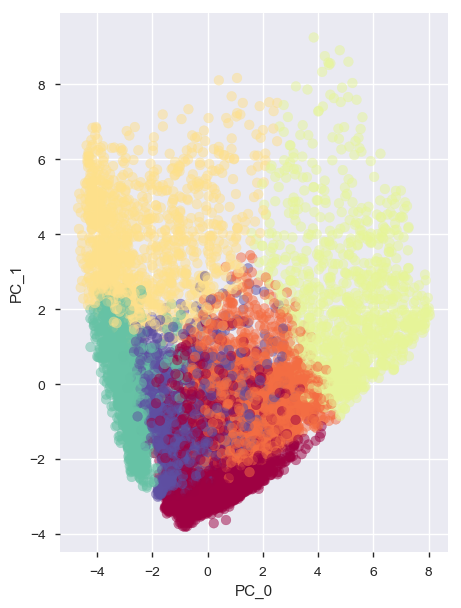

In [53]:
plt.figure(figsize=(5,7))
plt.scatter(data_final.iloc[:,0],data_final.iloc[:,1],c=km_3.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [54]:
cluster_df_6 = pd.concat([data[col_list],pd.Series(km_3.labels_,name = 'Cluster_6')],axis=1)
#Finding Mean of features for each cluster
cluster_df_6.groupby('Cluster_6').apply(lambda x:x[col_list].mean()).T

Cluster_6,0,1,2,3,4,5
BALANCE_FREQUENCY,0.814878,0.938176,0.962425,0.979682,0.873340,0.809353
Both,0.014486,0.986248,0.208185,0.916342,0.025332,0.012970
CASH_ADVANCE_FREQUENCY,0.023301,0.055632,0.413758,0.081270,0.218767,0.063439
CASH_ADVANCE_TRX,0.408015,1.049116,10.190391,1.853113,4.174306,1.116732
Installment_Purchases,0.985514,0.013752,0.130783,0.018482,0.019300,0.000000
Limit_usage,0.219578,0.335910,0.631496,0.319146,0.551194,0.335190
MINIMUM_PAYMENTS,406.787536,488.024772,1438.967940,834.473492,545.241417,433.008146
Monthly_avg_purchase,41.153710,91.424306,36.240038,278.989823,0.772664,53.227076
Monthly_cash_advance,10.970829,18.316970,321.049820,48.259613,97.723228,23.256017
None,0.000000,0.000000,0.420819,0.000000,0.946321,0.000000


#### With Cluster 4
* cluster 2 have highest mimnimum payments and highest Monthly cash advance. 
* cluster 3 have highest Monthly Average Purchase and payments.


In [55]:
x = cluster_df_6.groupby('Cluster_6').apply(lambda x:x['Cluster_6'].value_counts())
percent = pd.Series((x.values.astype('float')/ cluster_df_6.shape[0])*100,name = "Percentage")
print(x)
print('\n',pd.concat([pd.Series(x.values,name='Size'),percent],axis=1))

Cluster_6   
0          0    2071
1          1    1527
2          2    1124
3          3    1028
4          4    1658
5          5    1542
Name: Cluster_6, dtype: int64

    Size  Percentage
0  2071   23.139665
1  1527   17.061453
2  1124   12.558659
3  1028   11.486034
4  1658   18.525140
5  1542   17.229050


### Checking performance mtrics for Kmeans


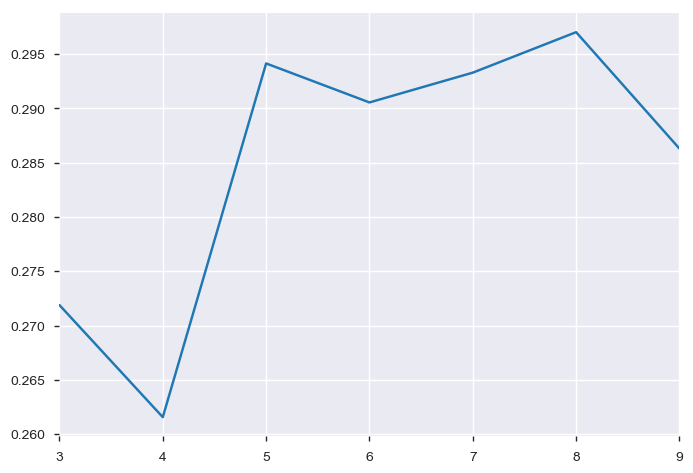

In [58]:
from sklearn.metrics import silhouette_score

score = {}
for n in range(3,10):
    km_score = KMeans(n_clusters =n)
    km_score.fit(data_final)
    score[n]= silhouette_score(data_final,km_score.labels_)
pd.Series(score).plot()

## Performance metrics also suggest that  K-means with 5 and 8 cluster is able to show distinguished characteristics of each cluster.

### Finding Behaviour with 8 Clusters:

In [63]:
km_4 = KMeans(n_clusters=8,random_state=11)
km_4 = km_4.fit(data_final)
km_4.labels_

array([4, 2, 0, ..., 4, 3, 0])

In [64]:
pd.Series(km_4.labels_).value_counts()

4    1567
3    1542
0    1525
5    1355
2     971
6     923
7     686
1     381
dtype: int64

Text(0, 0.5, 'PC_1')

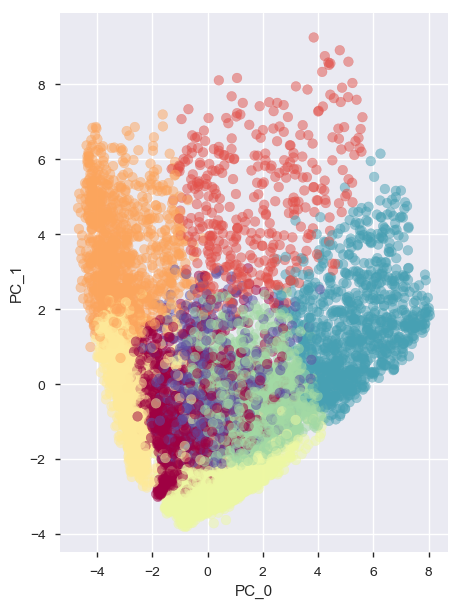

In [65]:
plt.figure(figsize=(5,7))
plt.scatter(data_final.iloc[:,0],data_final.iloc[:,1],c=km_4.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [66]:
cluster_df_8 = pd.concat([data[col_list],pd.Series(km_4.labels_,name = 'Cluster_8')],axis=1)
#Finding Mean of features for each cluster
cluster_df_8.groupby('Cluster_8').apply(lambda x:x[col_list].mean()).T

Cluster_8,0,1,2,3,4,5,6,7
BALANCE_FREQUENCY,0.813035,0.983273,0.946121,0.871857,0.750235,0.936690,0.978063,0.991149
Both,0.005246,0.839895,0.077240,0.027237,0.034461,0.998524,0.919827,0.106414
CASH_ADVANCE_FREQUENCY,0.063578,0.391745,0.412769,0.208440,0.006383,0.051766,0.031922,0.093765
CASH_ADVANCE_TRX,1.116066,9.871391,10.139032,3.869001,0.088066,0.940959,0.542795,1.838192
Installment_Purchases,0.000000,0.094488,0.079300,0.006485,0.965539,0.001476,0.009751,0.893586
Limit_usage,0.337555,0.606525,0.615191,0.548044,0.044610,0.310368,0.264246,0.748781
MINIMUM_PAYMENTS,436.245712,1608.560589,1313.326976,525.079302,169.428005,391.235806,655.666084,1269.345901
Monthly_avg_purchase,53.379967,176.576508,14.703864,0.683200,39.676779,88.286085,275.990667,51.275844
Monthly_cash_advance,23.186341,284.004662,318.586179,88.567615,3.515480,15.823334,12.503604,45.297060
None,0.000000,0.000000,0.575695,0.961738,0.000000,0.000000,0.000000,0.000000


In [67]:
x = cluster_df_8.groupby('Cluster_8').apply(lambda x:x['Cluster_8'].value_counts())
percent = pd.Series((x.values.astype('float')/ cluster_df_8.shape[0])*100,name = "Percentage")
print(x)
print('\n',pd.concat([pd.Series(x.values,name='Size'),percent],axis=1))

Cluster_8   
0          0    1525
1          1     381
2          2     971
3          3    1542
4          4    1567
5          5    1355
6          6     923
7          7     686
Name: Cluster_8, dtype: int64

    Size  Percentage
0  1525   17.039106
1   381    4.256983
2   971   10.849162
3  1542   17.229050
4  1567   17.508380
5  1355   15.139665
6   923   10.312849
7   686    7.664804


### Insights with 5 Clusters

- Cluster 0 customers having Credit Score and Monthly Cash Advance are high.
- Cluster 1 customers doing maximum Average Purchases.
- Cluster 2 customers have highest One Off Purchases and Monthly Cash Advance or Average Purchases are also high.
- Cluster 3 customers have maximum Monthly Cash advance and Credit Score, customers also doing installments and One Off -Purchases.
- Cluster 4 customers have maximum installments among all clusters.





# Marketing Strategy Suggested:

## a. Group 3
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
## b. Group 4
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
## c. Group 2
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
## d. Group 1 and 0
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       